<a href="https://colab.research.google.com/github/YuvanBharathi13/DeepLearning/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

In [ ]:
import tensorflow as tf

## Creating new data to view it

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

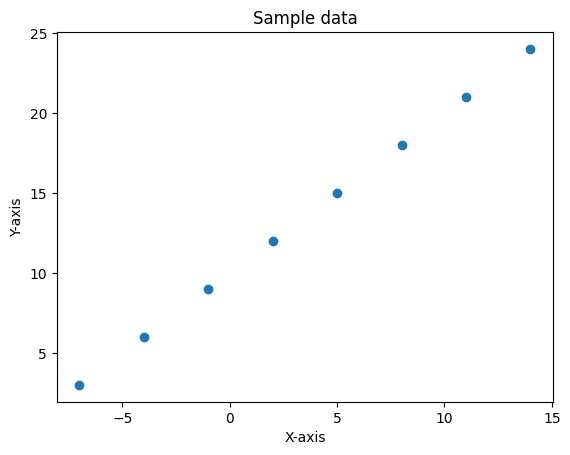

In [ ]:
plt.scatter(X,y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Sample data")
plt.show()

In [ ]:
y == X + 10 # from this we can tell that the equation of the line would be y = X +10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [ ]:
# our input and output shapes are going to be 1
X[0].shape, y[0].shape # its showing nothing cause when we are accesing 1 value from an array it returns a scalar.

((), ())

In [ ]:
X[0].ndim # this shows that it is a scalar

0

In [ ]:
# turning the numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

# Steps in creating a model in tensorflow
1. **Creating the model** - defining the input, output layers and alos the hidden layers.
2. **Compiling the model** - defining the loss function that will correct out model, choosing the optimzer that tells our model how to improve the patterns it is learning and evaluation metrics thats tells us the performance of our model.
3. **Fitting the model** - Letting the model find patterns in X and y which are our features and labels.

In [ ]:
X.ndim, tf.expand_dims(X, axis=-1).ndim

(1, 2)

In [ ]:
x_new = tf.expand_dims(X, axis=-1)
x_new[1,0]

<tf.Tensor: shape=(), dtype=float64, numpy=-4.0>

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. creating the model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=(1,))
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3.fit the model
model.fit(X,y,epochs=5) # since i have provided the input size i do not need to change the tensor to 2 dimensions

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 14.6182 - mae: 14.6182
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - loss: 14.4857 - mae: 14.4857
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - loss: 14.3532 - mae: 14.3532
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 14.2207 - mae: 14.2207
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 14.0882 - mae: 14.0882


In [ ]:
# predicting using a sample value
chumma = tf.constant([[17.0]]) # make sure the input is always a tensor
model.predict(chumma) # this is when the epochs is 5, has a MAE of 7.4738

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[18.919239]], dtype=float32)

# Improving the Model
Places to improve the model -
1. **Creating a model**- in this step in order to improve our model we may increase the **number of hidden layers**, we may **increase the number of neurons per layer** or change our **activation function** (in this case its linear by default).
2.**Compiling the model** - here we might the change the optmization function or the **learning rate**.
3. **Fitting a model** - here we might increase the number of **epochs** or give the model more **data**.

## Improving the model only by increasing the epoch number

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. creating the model using the sequential API
model_epoch = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_epoch.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3.fit the model
model_epoch.fit(tf.expand_dims(X, axis=-1),y,epochs=100) # Since i have not proved the input shape,
# i will have to convert my 1 dimensional tensor to 2 dimensions

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 9.0155 - mae: 9.0155
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - loss: 8.8830 - mae: 8.8830
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - loss: 8.7505 - mae: 8.7505
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - loss: 8.6180 - mae: 8.6180
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - loss: 8.4855 - mae: 8.4855
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 8.3530 - mae: 8.3530
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - loss: 8.2205 - mae: 8.2205
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 8.0880 - mae: 8.0880
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 7.9555 - mae: 7.9555
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - loss: 7.8230 - mae: 7.8230
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - loss: 7.6905 - mae: 7.6905
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 7.5580 - mae: 7.5580
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

In [ ]:
chumma = tf.constant([[17.0]])
model_epoch.predict(chumma) # this is when the epochs was 100, has a MAE of 6.8306

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[30.299425]], dtype=float32)

## Improving with another hidden layer

In [ ]:
model_layer = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu",input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model_layer.compile(loss = tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.SGD(),
                     metrics=["mae"])

model_layer.fit(X,y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step - loss: 14.7415 - mae: 14.7415
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 14.1618 - mae: 14.1618
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 13.5940 - mae: 13.5940
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 13.0493 - mae: 13.0493
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 12.5042 - mae: 12.5042
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 11.9535 - mae: 11.9535
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.3947 - mae: 11.3947
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 10.8288 - mae: 10.8288
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 10.2442 - mae: 10.2442
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.6341 - mae: 9.6341
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 8.9998 - mae: 8.9998
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.3688 - mae: 8.3688
Epoch 13/100
1/1 ━━━━━━━━━━━━━

In [ ]:
model_layer.predict(tf.constant([17.0])) # we can see how much our MAE has improved from when we had only 1 layer.
# Even though the MAE is better, the prediction is worse than the previous one.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


array([[32.24893]], dtype=float32)

So, what might be happening in the above case where the training metric has improved but the prediction has worsened is that by increasing the number of layers or increasing the neurons per layer we are over fitting the data and that may cause the prediction value to be worse than before.

Note - The learning rate is the most important hyperparameter that we can change to improve our model.

# Evaluating models

In [48]:
X = np.arange(-100,100,4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

## Visualizing the data

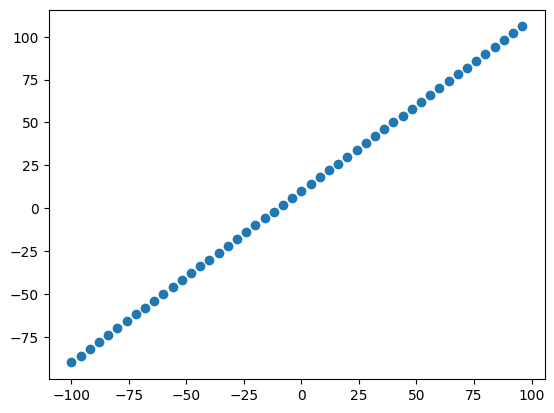

In [ ]:
plt.scatter(X,y)

In [47]:
# Splitting the dataset
X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

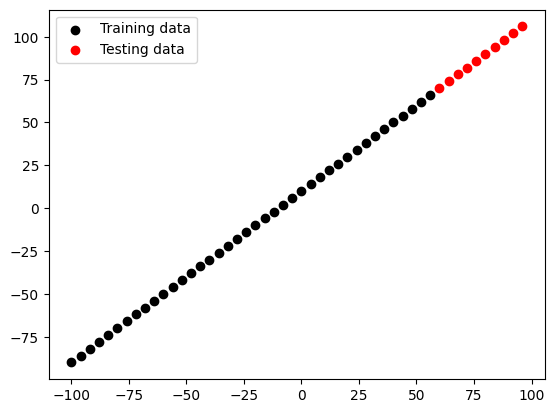

In [ ]:
### Vizualizing the training data
plt.scatter(X_train,y_train,c="black",label="Training data")

### Vizualizing the testing data
plt.scatter(X_test,y_test,c="r",label="Testing data")

plt.legend()
plt.show()

In [49]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Vizualizing the model

In [50]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* **Total params** = total number of parameters in the model.
* **Trainable params** = total number of parameters that the model can update as it trains.
* **Non-trainable params** = these are the parameters that the model cant update as these are from an imported model which is already trained. imported models are mostly used during **transfer learning**.

In [51]:
# 3. Fitting the model
model.fit(X_train,y_train,epochs=100,verbose=0)

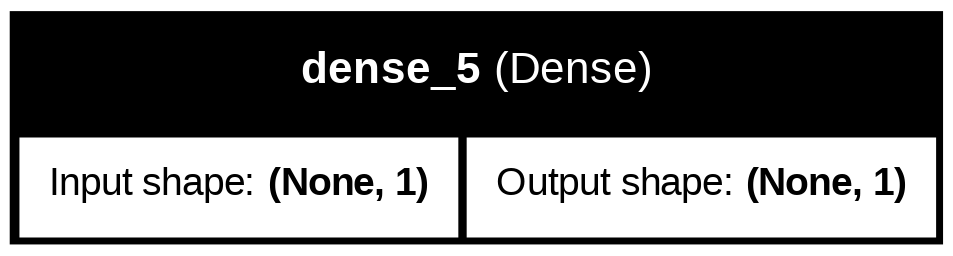

In [52]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True,show_layer_names = True)

## Visulaizing the model Predictions

In [53]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[ 63.78623 ],
       [ 67.94456 ],
       [ 72.10289 ],
       [ 76.26122 ],
       [ 80.419556],
       [ 84.57789 ],
       [ 88.73621 ],
       [ 92.89455 ],
       [ 97.05288 ],
       [101.21121 ]], dtype=float32)

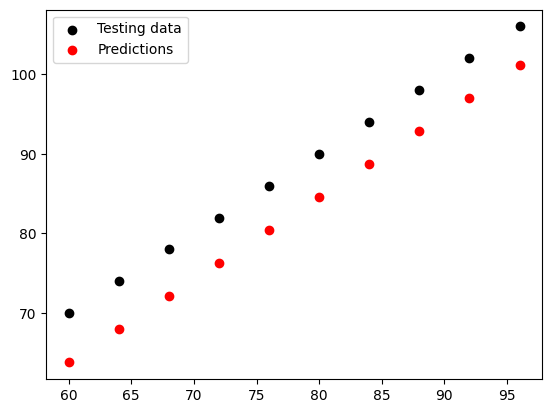

In [54]:
plt.scatter(X_test,y_test,c="black",label="Testing data")
plt.scatter(X_test,y_pred,c="r",label="Predictions")
plt.legend()
plt.show()

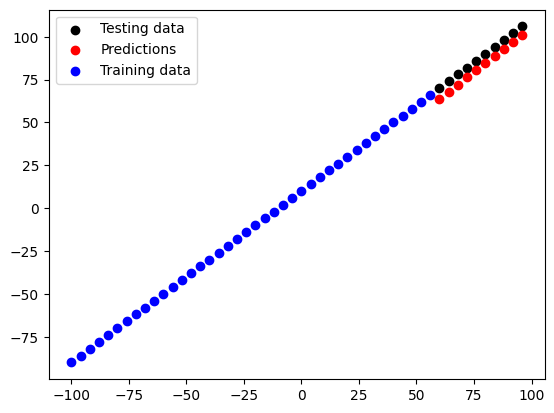

In [55]:
plt.scatter(X_test,y_test,c="black",label="Testing data")
plt.scatter(X_test,y_pred,c="r",label="Predictions")
plt.scatter(X_train,y_train,c="blue",label="Training data")
plt.legend()
plt.show() # shitty ass model

## Evaluations metrics

### MAE

In [56]:
y_test.shape, y_pred.shape

(TensorShape([10]), (10, 1))

In [57]:
mae = tf.keras.losses.MeanAbsoluteError()
mae_value = mae.call(y_test,y_pred)
mae_value

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([6.213772 , 6.055443 , 5.89711  , 5.738777 , 5.5804443, 5.4221115,
       5.2637863, 5.1054535, 4.9471207, 4.788788 ], dtype=float32)>

In [58]:
# changing the shape to get 1 value
y_pred = tf.squeeze(y_pred)

In [59]:
mae_value = mae(y_test,y_pred)
mae_value

<tf.Tensor: shape=(), dtype=float32, numpy=5.501280784606934>

### MSE

In [61]:
mse = tf.keras.losses.MeanSquaredError()
mse_value = mse(y_test,y_pred)
mse_value

<tf.Tensor: shape=(), dtype=float32, numpy=30.470905303955078>